In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
# for named entity recognition (NER)
from nltk import ne_chunk
# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))
nltk.download('wordnet')
import re

[nltk_data] Downloading package punkt to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [129]:
tagalog_stopwords = pd.read_csv("tagalog_stop_words.txt")
tagalog_stopwords = tagalog_stopwords['stopwords'].tolist()
tagalog_stopwords

['ako',
 'sa',
 'akin',
 'ko',
 'aking',
 'sarili',
 'kami',
 'atin',
 'ang',
 'aming',
 'amin',
 'ating',
 'ka',
 'iyong',
 'iyo',
 'inyong',
 'siya',
 'kanya',
 'mismo',
 'ito',
 'nito',
 'kanyang',
 'sila',
 'nila',
 'kanila',
 'kanilang',
 'kung',
 'ano',
 'alin',
 'sino',
 'kanino',
 'na',
 'mga',
 'iyon',
 'am',
 'ay',
 'maging',
 'naging',
 'mayroon',
 'may',
 'nagkaroon',
 'pagkakaroon',
 'gumawa',
 'ginagawa',
 'ginawa',
 'paggawa',
 'ibig',
 'dapat',
 'maaari',
 'marapat',
 'kong',
 'ikaw',
 'tayo',
 'hindi',
 'namin',
 'gusto',
 'nais',
 'niyang',
 'nilang',
 'niya',
 'huwag',
 'ginawang',
 'gagawin',
 'maaaring',
 'sabihin',
 'narito',
 'kapag',
 'ni',
 'nasaan',
 'bakit',
 'paano',
 'kailangan',
 'walang',
 'katiyakan',
 'isang',
 'at',
 'pero',
 'o',
 'dahil',
 'bilang',
 'hanggang',
 'habang',
 'ng',
 'pamamagitan',
 'para',
 'tungkol',
 'laban',
 'pagitan',
 'panahon',
 'bago',
 'pagkatapos',
 'itaas',
 'ibaba',
 'mula',
 'pataas',
 'pababa',
 'palabas',
 'ibabaw',
 'il

In [130]:
all_stopwords = stopwords.words('english') + tagalog_stopwords

In [131]:
english_dataset = pd.read_csv('English - Sheet1.csv')
english_dataset = english_dataset.astype(str)

taglish_dataset = pd.read_csv('Taglish - Sheet1.csv')
taglish_dataset = taglish_dataset.astype(str)

In [132]:
processed_text = []
def clean_text(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(text)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in all_stopwords and len(w)>3]
  processed_text.insert(tokens)
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [134]:
english_dataset['Content'] = english_dataset['Content'].apply(clean_text)
taglish_dataset['Content'] = taglish_dataset['Content'].apply(clean_text)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [135]:
vect =TfidfVectorizer(stop_words=all_stopwords,max_features=1000)
vect_text=vect.fit_transform(taglish_dataset['Content'])

In [136]:
print(vect_text.shape)
print(vect_text)

(210, 1000)
  (0, 79)	0.28516865645111744
  (0, 999)	0.15217433331891547
  (0, 161)	0.22203612758543373
  (0, 132)	0.28516865645111744
  (0, 835)	0.28516865645111744
  (0, 470)	0.14704503188828077
  (0, 167)	0.26473539151161274
  (0, 370)	0.28516865645111744
  (0, 581)	0.28516865645111744
  (0, 412)	0.28516865645111744
  (0, 97)	0.23899252215104178
  (0, 434)	0.18037596505134007
  (0, 915)	0.19925850357421304
  (0, 729)	0.21530686218459918
  (0, 607)	0.22203612758543373
  (0, 368)	0.2298044943783536
  (0, 538)	0.26473539151161274
  (1, 279)	0.27060449819267113
  (1, 935)	0.24429091690087315
  (1, 475)	0.24429091690087315
  (1, 379)	0.2269586039963402
  (1, 332)	0.2200801527375169
  (1, 451)	0.25578545770710487
  (1, 790)	0.2914907626766928
  (1, 317)	0.27060449819267113
  :	:
  (204, 251)	0.5630694868580313
  (205, 83)	0.5598394316520996
  (205, 77)	0.5598394316520996
  (205, 515)	0.46918703982138416
  (205, 700)	0.39118172656523087
  (206, 349)	0.6121361004059623
  (206, 498)	0.537154

In [137]:
idf=vect.idf_

In [138]:
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)

In [139]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [140]:
print(lsa_top)
print(lsa_top.shape)

[[ 0.14624012  0.18637868 -0.03648457 ... -0.14861936 -0.12304923
  -0.04153595]
 [ 0.09820666  0.04817805 -0.0302311  ...  0.08738497  0.15005673
  -0.03081681]
 [ 0.11617713  0.19686918 -0.11825516 ... -0.02671974  0.28311389
   0.02594461]
 ...
 [ 0.23854903 -0.20519724  0.02739469 ... -0.08319179  0.08387214
   0.07204081]
 [ 0.08167384  0.04412026 -0.06959691 ...  0.20640601 -0.00565673
  -0.14430173]
 [ 0.05329462  0.10440663 -0.07585127 ... -0.0161732   0.21433016
   0.1556048 ]]
(210, 10)


In [141]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  14.624011850118885
Topic  1  :  18.63786786838511
Topic  2  :  -3.648457481993652
Topic  3  :  1.8641643381757673
Topic  4  :  -15.089606827008978
Topic  5  :  0.8271960927510843
Topic  6  :  -1.6767016581351288
Topic  7  :  -14.861936263053686
Topic  8  :  -12.304922609555506
Topic  9  :  -4.153595390086172


In [142]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00569494  0.0078721   0.01600691 ...  0.00283457  0.00404033
   0.19404811]
 [ 0.01078322  0.00546556  0.03457429 ...  0.00234199  0.00658553
   0.3595234 ]
 [-0.0022785  -0.00680866 -0.01606409 ... -0.0018111  -0.00378601
  -0.05090639]
 ...
 [-0.00967933 -0.00102732 -0.02596849 ...  0.00603184  0.00501543
  -0.11167351]
 [-0.00516024  0.00750986  0.02895463 ...  0.00426788  0.00064037
  -0.05090459]
 [ 0.0049924   0.00475239  0.00200108 ... -0.00310018  0.00130932
   0.03453449]]


In [143]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
teacher gamitin tool student pwede baka yung lang naman estudyante 

Topic 1: 
yung lang estudyante naman work kasi school education copy technology 

Topic 2: 
estudyante nakakatulong lesson baka gustong worth maintindihan pagaaral mabilis makakatulong 

Topic 3: 
pwede gamitin naman personalized learning supervision experience learner slow paste 

Topic 4: 
education pwede pilipinas advanced gamitin estudyante learning paggamit personalized masyadong 

Topic 5: 
pwedeng paggamit makatulong pwede depende gamitin lang naman guidance maayos 

Topic 6: 
school pilipinas masyadong advanced public work gamitin worth subukan access 

Topic 7: 
learning student traditional teaching pwedeng supplement help method improve personalized 

Topic 8: 
work nakakatulong smart lesson hard make kayo paggamit tool gamitin 

Topic 9: 
traditional teaching education supplement method technology maganda naman magamit teacher 



In [144]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

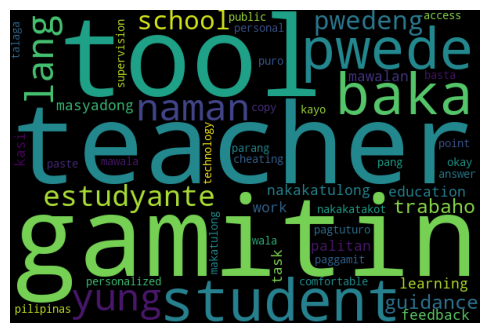

In [145]:
draw_word_cloud(0)

In [146]:
from gensim.models.coherencemodel import CoherenceModel

processed_docs = [doc.split() for doc in taglish_dataset['Content']]
dictionary = Dictionary(processed_docs)

coherence_model_lsa = CoherenceModel(topics=topics, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()

In [147]:
coherence_lsa

0.4090894096681634